In [1]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tslearn scikit-learn

In [3]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import ast
from sklearn.decomposition import PCA
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from scipy.spatial.distance import jensenshannon
from scipy.stats import wasserstein_distance

In [4]:
json_file = "C:\\Users\\tigra\\OneDrive\\Documents\\cleaned_df.jsonl"

In [5]:
timestamps = []
channel_x = []
channel_y = []

with open(json_file, 'r') as file:
    for line in file:
        try:
            data = json.loads(line)
            timestamps.append(data['timestamp'])
            channel_x.append(data['channel_x'])
            channel_y.append(data['channel_y'])
            #print(data)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")


time_series_data = pd.DataFrame({
    'timestamp': timestamps,
    'channel_x': channel_x,
    'channel_y': channel_y
})

In [6]:
time_series_data

,timestamp,channel_x,channel_y
0,9:39:39,"[0.8860844827, 0.2398780831, -0.7588045344, -1...","[-1.0970508836, 1.0021835283, 0.5548057028, 0...."
1,9:39:49,"[-0.3132895666, -0.0143246711, 0.0585480222, -...","[0.7455526429, -0.9193375962, 0.9783047733, -0..."
2,9:39:59,"[-0.1941087483, -0.2919947281, -0.6816562247, ...","[0.3501117451, -0.4537091558, -1.3679966717, -..."
3,9:40:9,"[0.0933388765, -0.0111775116, 0.0284666356, -0...","[-2.1192795178, 0.4437364412, -0.4180832858, 0..."
4,9:40:19,"[-0.3346322388, 0.2124313304, 0.568905011, 0.8...","[2.0316917182, 0.3680117201, -0.7623467467, -0..."
...,...,...,...
2798,17:25:59,"[0.0571303255, 0.0167320325, -0.1312956609, -0...","[-0.2585808797, 0.4511690181, 1.3718370909, -0..."
2799,17:26:9,"[0.7842501127, 0.6485894692, 0.884297264, 0.24...","[-0.8001867618, -0.6901360987, 0.2612386972, 1..."
2800,17:26:19,"[0.542245385, 0.9750843589, 0.6135731943, 0.73...","[0.0708408103, -0.585789414, -0.2912445529, 0...."
2801,17:26:29,"[-0.1005815044, 0.1743217626, 0.6969714747, 0....","[-1.461029906, 0.1401113917, 2.7590324291, 0.3..."


In [7]:
time_series_data_dtw = time_series_data.copy()
time_series_data_dtw

,timestamp,channel_x,channel_y
0,9:39:39,"[0.8860844827, 0.2398780831, -0.7588045344, -1...","[-1.0970508836, 1.0021835283, 0.5548057028, 0...."
1,9:39:49,"[-0.3132895666, -0.0143246711, 0.0585480222, -...","[0.7455526429, -0.9193375962, 0.9783047733, -0..."
2,9:39:59,"[-0.1941087483, -0.2919947281, -0.6816562247, ...","[0.3501117451, -0.4537091558, -1.3679966717, -..."
3,9:40:9,"[0.0933388765, -0.0111775116, 0.0284666356, -0...","[-2.1192795178, 0.4437364412, -0.4180832858, 0..."
4,9:40:19,"[-0.3346322388, 0.2124313304, 0.568905011, 0.8...","[2.0316917182, 0.3680117201, -0.7623467467, -0..."
...,...,...,...
2798,17:25:59,"[0.0571303255, 0.0167320325, -0.1312956609, -0...","[-0.2585808797, 0.4511690181, 1.3718370909, -0..."
2799,17:26:9,"[0.7842501127, 0.6485894692, 0.884297264, 0.24...","[-0.8001867618, -0.6901360987, 0.2612386972, 1..."
2800,17:26:19,"[0.542245385, 0.9750843589, 0.6135731943, 0.73...","[0.0708408103, -0.585789414, -0.2912445529, 0...."
2801,17:26:29,"[-0.1005815044, 0.1743217626, 0.6969714747, 0....","[-1.461029906, 0.1401113917, 2.7590324291, 0.3..."


In [8]:
#All data seems to have loaded correctly and the lengths are similar. Proceeding to cluster.

In [9]:
#Store'channel_x' and 'channel_y' columns as lists
data_x = np.array(time_series_data['channel_x'].tolist())
data_y = np.array(time_series_data['channel_y'].tolist())

In [10]:
# Initialize TimeSeriesKMeans with DTW metric for 4 clusters
model_x = TimeSeriesKMeans(n_clusters=4, metric="euclidean", random_state=0)
model_y = TimeSeriesKMeans(n_clusters=4, metric="euclidean", random_state=0)

In [11]:
# Fit the model and predict clusters
clusters_x = model_x.fit_predict(data_x)
clusters_y = model_y.fit_predict(data_y)

In [12]:
# Add clusters back to the DataFrame
time_series_data['cluster_x'] = clusters_x
time_series_data['cluster_y'] = clusters_y

In [13]:
time_series_data

,timestamp,channel_x,channel_y,cluster_x,cluster_y
0,9:39:39,"[0.8860844827, 0.2398780831, -0.7588045344, -1...","[-1.0970508836, 1.0021835283, 0.5548057028, 0....",3,1
1,9:39:49,"[-0.3132895666, -0.0143246711, 0.0585480222, -...","[0.7455526429, -0.9193375962, 0.9783047733, -0...",1,2
2,9:39:59,"[-0.1941087483, -0.2919947281, -0.6816562247, ...","[0.3501117451, -0.4537091558, -1.3679966717, -...",2,1
3,9:40:9,"[0.0933388765, -0.0111775116, 0.0284666356, -0...","[-2.1192795178, 0.4437364412, -0.4180832858, 0...",0,2
4,9:40:19,"[-0.3346322388, 0.2124313304, 0.568905011, 0.8...","[2.0316917182, 0.3680117201, -0.7623467467, -0...",3,2
...,...,...,...,...,...
2798,17:25:59,"[0.0571303255, 0.0167320325, -0.1312956609, -0...","[-0.2585808797, 0.4511690181, 1.3718370909, -0...",0,3
2799,17:26:9,"[0.7842501127, 0.6485894692, 0.884297264, 0.24...","[-0.8001867618, -0.6901360987, 0.2612386972, 1...",0,1
2800,17:26:19,"[0.542245385, 0.9750843589, 0.6135731943, 0.73...","[0.0708408103, -0.585789414, -0.2912445529, 0....",3,0
2801,17:26:29,"[-0.1005815044, 0.1743217626, 0.6969714747, 0....","[-1.461029906, 0.1401113917, 2.7590324291, 0.3...",1,1


In [14]:
cluster_x = time_series_data['cluster_x'].tolist()
cluster_y = time_series_data['cluster_y'].tolist()

In [15]:
def fix_timestamp_format(ts):
    # Check if the timestamp is in HH:MM:SS format
    parts = ts.split(":")
    # Ensure minutes and seconds have two digits each
    if len(parts) == 3:
        hour, minute, second = parts
        minute = minute.zfill(2)  #Add leading zero if missing
        second = second.zfill(2)  #Add leading zero if missing
        return f"{hour}:{minute}:{second}"
    return ts  
    
time_series_data['timestamp'] = time_series_data['timestamp'].apply(fix_timestamp_format)

C:\Users\tigra\AppData\Local\Temp\ipykernel_5936\3610437514.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_series_data['timestamp'] = pd.to_datetime(time_series_data['timestamp'])


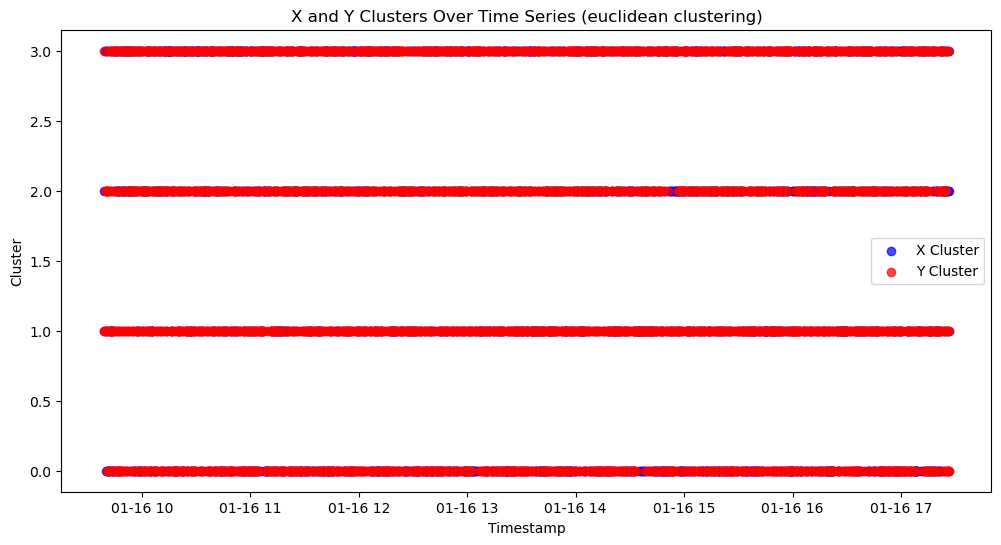

In [16]:
time_series_data['timestamp'] = pd.to_datetime(time_series_data['timestamp'])

plt.figure(figsize=(12, 6))

# Plot x cluster over time as dots
plt.scatter(time_series_data['timestamp'], time_series_data['cluster_x'], label='X Cluster', color='blue', alpha=0.7)

# Plot y cluster over time as dots
plt.scatter(time_series_data['timestamp'], time_series_data['cluster_y'], label='Y Cluster', color='red', alpha=0.7)

# Labels and title
plt.xlabel("Timestamp")
plt.ylabel("Cluster")
plt.title("X and Y Clusters Over Time Series (euclidean clustering)")
plt.legend()

# Show plot
plt.show()

In [17]:
#Let's do the same with DTW

In [18]:
#Truncate the data. Too long....

time_series_data_dtw = time_series_data_dtw.iloc[::60].reset_index(drop=True)

time_series_data_dtw

,timestamp,channel_x,channel_y
0,9:39:39,"[0.8860844827, 0.2398780831, -0.7588045344, -1...","[-1.0970508836, 1.0021835283, 0.5548057028, 0...."
1,9:49:39,"[-0.0024716294, 0.5516104976, 0.2954781936, -1...","[1.0085640774, -0.9551936425, -0.8783607743, 0..."
2,9:59:39,"[1.7364293872, 0.2598724586, 0.3395427965, -0....","[-0.3424166263, 1.0060626315, -1.425849961, -0..."
3,10:9:39,"[-0.6897539323, 0.5705622054, -0.0873228185, 0...","[0.8916814871, -1.7555155803, 1.3262297494, -0..."
4,10:19:39,"[-0.2961443712, 0.2217341985, 0.5115315329, 0....","[0.4232185389, 1.5288676939, -1.2384384446, -0..."
5,10:29:39,"[-1.7857910346, -0.6142675222, -1.3631032639, ...","[-0.3480060841, 0.095087215, -1.7451280176, 0...."
6,10:39:39,"[0.3058884392, 0.5738621562, 0.1618165483, 0.1...","[2.7717804907, -0.8784399243, 0.2683394592, 1...."
7,10:49:39,"[1.0999683515, 1.2425940412, 0.0689034702, 0.2...","[0.2228997096, -1.4504734076, -0.485332896, -0..."
8,10:59:39,"[-0.7399783014, -1.174273005, -1.5091109063, -...","[3.6318980082, -1.1007864593, 0.1899456682, 0...."
9,11:9:39,"[0.8182380213, 0.2601833266, -0.8777494307, -0...","[-0.946636151, 1.0062882539, -0.3110994869, -1..."


In [19]:
data_x = np.array(time_series_data_dtw['channel_x'].tolist())
data_y = np.array(time_series_data_dtw['channel_y'].tolist())

In [20]:
# Initialize TimeSeriesKMeans with DTW metric for 4 clusters
model_x = TimeSeriesKMeans(n_clusters=4, metric="dtw", random_state=0)
model_y = TimeSeriesKMeans(n_clusters=4, metric="dtw", random_state=0)

In [21]:
# Fit the model and predict clusters
clusters_x = model_x.fit_predict(data_x)
clusters_y = model_y.fit_predict(data_y)

In [22]:
# Add clusters back to the DataFrame
time_series_data_dtw['cluster_x'] = clusters_x
time_series_data_dtw['cluster_y'] = clusters_y

In [23]:
time_series_data_dtw

,timestamp,channel_x,channel_y,cluster_x,cluster_y
0,9:39:39,"[0.8860844827, 0.2398780831, -0.7588045344, -1...","[-1.0970508836, 1.0021835283, 0.5548057028, 0....",3,3
1,9:49:39,"[-0.0024716294, 0.5516104976, 0.2954781936, -1...","[1.0085640774, -0.9551936425, -0.8783607743, 0...",3,3
2,9:59:39,"[1.7364293872, 0.2598724586, 0.3395427965, -0....","[-0.3424166263, 1.0060626315, -1.425849961, -0...",3,3
3,10:9:39,"[-0.6897539323, 0.5705622054, -0.0873228185, 0...","[0.8916814871, -1.7555155803, 1.3262297494, -0...",3,3
4,10:19:39,"[-0.2961443712, 0.2217341985, 0.5115315329, 0....","[0.4232185389, 1.5288676939, -1.2384384446, -0...",3,3
5,10:29:39,"[-1.7857910346, -0.6142675222, -1.3631032639, ...","[-0.3480060841, 0.095087215, -1.7451280176, 0....",3,3
6,10:39:39,"[0.3058884392, 0.5738621562, 0.1618165483, 0.1...","[2.7717804907, -0.8784399243, 0.2683394592, 1....",3,3
7,10:49:39,"[1.0999683515, 1.2425940412, 0.0689034702, 0.2...","[0.2228997096, -1.4504734076, -0.485332896, -0...",3,2
8,10:59:39,"[-0.7399783014, -1.174273005, -1.5091109063, -...","[3.6318980082, -1.1007864593, 0.1899456682, 0....",3,3
9,11:9:39,"[0.8182380213, 0.2601833266, -0.8777494307, -0...","[-0.946636151, 1.0062882539, -0.3110994869, -1...",3,2


In [24]:
time_series_data_dtw['timestamp'] = time_series_data_dtw['timestamp'].apply(fix_timestamp_format)

In [25]:
cluster_x_dtw = time_series_data_dtw['cluster_x'].tolist()
cluster_y_dtw = time_series_data_dtw['cluster_y'].tolist()

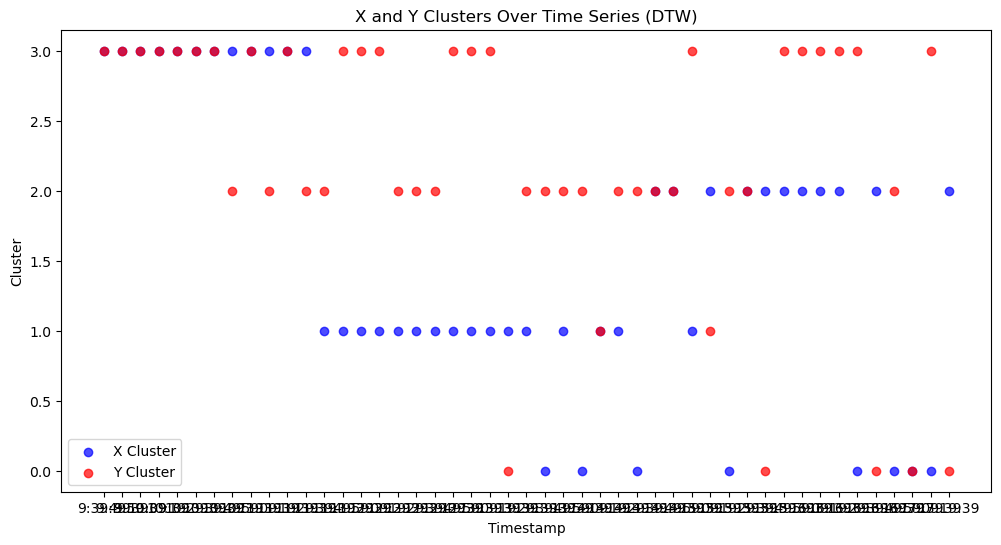

In [26]:
time_series_data['timestamp'] = pd.to_datetime(time_series_data['timestamp'])

plt.figure(figsize=(12, 6))

# Plot x cluster over time as dots
plt.scatter(time_series_data_dtw['timestamp'], time_series_data_dtw['cluster_x'], label='X Cluster', color='blue', alpha=0.7)

# Plot y cluster over time as dots
plt.scatter(time_series_data_dtw['timestamp'], time_series_data_dtw['cluster_y'], label='Y Cluster', color='red', alpha=0.7)

# Labels and title
plt.xlabel("Timestamp")
plt.ylabel("Cluster")
plt.title("X and Y Clusters Over Time Series (DTW)")
plt.legend()

# Show plot
plt.show()

In [27]:
#Imported JS distance
lambda_penalty = 0.5 #regularization

clusters = time_series_data_dtw.groupby('cluster_x')

In [28]:
clusters

In [29]:
#Represent each cluster as a probability distribution
cluster_distributions = {}

for cluster_label, group in clusters:
    # Flatten the `channel_x` time series data for the current cluster
    flattened_channel_x = np.concatenate(group['channel_x'].tolist())
    
    # Create a histogram for the flattened data
    hist, bin_edges = np.histogram(flattened_channel_x, bins=50, density=True)  # Normalize to a probability distribution
    cluster_distributions[cluster_label] = hist / hist.sum()  # Ensure it sums to 1


In [30]:
# Calculate JSD between all pairs of clusters
jsd_values = []
cluster_labels = list(cluster_distributions.keys())

for i in range(len(cluster_labels)):
    for j in range(i + 1, len(cluster_labels)):
        cluster_i = cluster_distributions[cluster_labels[i]]
        cluster_j = cluster_distributions[cluster_labels[j]]
        # Calculate JSD and append to the list
        jsd = jensenshannon(cluster_i, cluster_j, base=2) ** 2  # JSD is squared to align with KL divergence units
        jsd_values.append(jsd)

In [31]:
# Compute the sum of JSD values and their variance
jsd_sum = sum(jsd_values)
jsd_variance = np.var(jsd_values)

# Calculate the regularized metric
regularized_metric = jsd_sum - lambda_penalty * jsd_variance

print(f"Sum of JSD values: {jsd_sum}")
print(f"Variance of JSD values: {jsd_variance}")
print(f"Regularized Clustering Metric: {regularized_metric}")

Sum of JSD values: 1.5337046667802592
Variance of JSD values: 0.03423546951124963
Regularized Clustering Metric: 1.5165869320246343


In [32]:
# Calculate Wasserstein distance between all pairs of clusters
wasserstein_distances = []
cluster_labels = list(cluster_distributions.keys())

for i in range(len(cluster_labels)):
    for j in range(i + 1, len(cluster_labels)):
        cluster_i = cluster_distributions[cluster_labels[i]]
        cluster_j = cluster_distributions[cluster_labels[j]]
        # Calculate Wasserstein distance and append to the list
        w_distance = wasserstein_distance(cluster_i, cluster_j)
        wasserstein_distances.append(w_distance)

In [33]:
# Compute the sum of Wasserstein distances and their variance
wasserstein_sum = sum(wasserstein_distances)
wasserstein_variance = np.var(wasserstein_distances)

In [34]:
# Calculate the regularized metric
regularized_metric_wasserstein = wasserstein_sum - lambda_penalty * wasserstein_variance

print(f"Sum of Wasserstein distances: {wasserstein_sum}")
print(f"Variance of Wasserstein distances: {wasserstein_variance}")
print(f"Regularized Clustering Metric (Wasserstein): {regularized_metric_wasserstein}")

Sum of Wasserstein distances: 0.04070754437694649
Variance of Wasserstein distances: 8.634391510926991e-06
Regularized Clustering Metric (Wasserstein): 0.04070322718119103


In [35]:
#Repeat the whole thing with y cluster

In [36]:
lambda_penalty = 0.5 #regularization

clusters = time_series_data_dtw.groupby('cluster_y')

#Represent each cluster as a probability distribution
cluster_distributions = {}

for cluster_label, group in clusters:
    # Flatten the `channel_y` time series data for the current cluster
    flattened_channel_y = np.concatenate(group['channel_y'].tolist())
    
    # Create a histogram for the flattened data
    hist, bin_edges = np.histogram(flattened_channel_y, bins=50, density=True)  # Normalize to a probability distribution
    cluster_distributions[cluster_label] = hist / hist.sum()  # Ensure it sums to 1

# Calculate JSD between all pairs of clusters
jsd_values = []
cluster_labels = list(cluster_distributions.keys())

for i in range(len(cluster_labels)):
    for j in range(i + 1, len(cluster_labels)):
        cluster_i = cluster_distributions[cluster_labels[i]]
        cluster_j = cluster_distributions[cluster_labels[j]]
        # Calculate JSD and append to the list
        jsd = jensenshannon(cluster_i, cluster_j, base=2) ** 2  # JSD is squared to align with KL divergence units
        jsd_values.append(jsd)

# Compute the sum of JSD values and their variance
jsd_sum = sum(jsd_values)
jsd_variance = np.var(jsd_values)

# Calculate the regularized metric
regularized_metric = jsd_sum - lambda_penalty * jsd_variance

print(f"Sum of JSD values: {jsd_sum}")
print(f"Variance of JSD values: {jsd_variance}")
print(f"Regularized Clustering Metric: {regularized_metric}")
print()

# Calculate Wasserstein distance between all pairs of clusters
wasserstein_distances = []
cluster_labels = list(cluster_distributions.keys())

for i in range(len(cluster_labels)):
    for j in range(i + 1, len(cluster_labels)):
        cluster_i = cluster_distributions[cluster_labels[i]]
        cluster_j = cluster_distributions[cluster_labels[j]]
        # Calculate Wasserstein distance and append to the list
        w_distance = wasserstein_distance(cluster_i, cluster_j)
        wasserstein_distances.append(w_distance)

# Compute the sum of Wasserstein distances and their variance
wasserstein_sum = sum(wasserstein_distances)
wasserstein_variance = np.var(wasserstein_distances)

# Calculate the regularized metric
regularized_metric_wasserstein = wasserstein_sum - lambda_penalty * wasserstein_variance

print(f"Sum of Wasserstein distances: {wasserstein_sum}")
print(f"Variance of Wasserstein distances: {wasserstein_variance}")
print(f"Regularized Clustering Metric (Wasserstein): {regularized_metric_wasserstein}")

Sum of JSD values: 1.2846614893002593
Variance of JSD values: 0.02272739318778043
Regularized Clustering Metric: 1.2732977927063691

Sum of Wasserstein distances: 0.05985324128348749
Variance of Wasserstein distances: 3.281397436061247e-05
Regularized Clustering Metric (Wasserstein): 0.059836834296307186
